<a href="https://colab.research.google.com/github/neel-machine/LDA_Topic_Modelling/blob/main/topic_fresh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import nltk,re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
df = pd.read_csv('doordash_appstore_reviews.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3340 non-null   int64 
 1   title              3340 non-null   object
 2   isEdited           3340 non-null   bool  
 3   date               3340 non-null   object
 4   rating             3340 non-null   int64 
 5   review             3340 non-null   object
 6   userName           3340 non-null   object
 7   developerResponse  57 non-null     object
dtypes: bool(1), int64(2), object(5)
memory usage: 186.0+ KB


In [4]:
pd.set_option('display.max_colwidth',None)
df.review[:1]

0    I've been using door dash with dash pass for a few months, ordering for and with my girlfriend and family, occasionally with them paying. I support the drivers a lot as well, and I would order every day, giving generous tips and additional cash if I had it. But they just added another two factor authorization that doesn't work properly at all, and it ended in me wasting money on dash pass, on my account and my mom's account for literally no reason, and I guarantee it's causing a lot of dashers to lose money. So I called technical support and they sent me a troubleshooting list to start off with, and I followed it step by step, removing the cards, authorizing them one at a time, everything they said to do. Needless to say, their first branch of customer service was nothing short of a heaving pile of garbage. They said to wait snd try again later, so then comes the next day. I tried ordering food, with two cards with the same general info, and SHABAM, nothing happens. Well, not noth

Looking at one review to estimate steps for text preprocessing. 


1.   Convert all text into lowercase
2.   Remove punctuations
3.   Lemmatise the text: Brings context of words     unlike stemming
      Examples of lemmatization:

      -> rocks : rock
      -> corpora : corpus
      -> better : good
4.   Remove emojis

Reg Ex:

String literals may optionally be prefixed with a letter 'r' or 'R'; such strings are called raw strings and use different rules for interpreting backslash escape sequences.



In [5]:
lemmatizer = WordNetLemmatizer() 
def clean_text(review):

  #wrd = nltk.word_tokenize(string)

  txt = ''.join([lemmatizer.lemmatize(w).lower() for w in review])
  #string = re.sub(r'[^A-Za-z]','',w)

  cln_txt = ' '.join([re.sub(r'[^A-Za-z]','',wrd) for wrd in txt.split()])
  return cln_txt



In [6]:
clean_text("sample,TEXT344 for cleaning")

'sampletext for cleaning'

In [7]:
df.review = df.review.apply(clean_text)

In [8]:
df.review[:1]

0    ive been using door dash with dash pass for a few months ordering for and with my girlfriend and family occasionally with them paying i support the drivers a lot as well and i would order every day giving generous tips and additional cash if i had it but they just added another two factor authorization that doesnt work properly at all and it ended in me wasting money on dash pass on my account and my moms account for literally no reason and i guarantee its causing a lot of dashers to lose money so i called technical support and they sent me a troubleshooting list to start off with and i followed it step by step removing the cards authorizing them one at a time everything they said to do needless to say their first branch of customer service was nothing short of a heaving pile of garbage they said to wait snd try again later so then comes the next day i tried ordering food with two cards with the same general info and shabam nothing happens well not nothing it repeatedly asks me to

In [9]:
lemmatizer.lemmatize('history')

'history'

In [10]:
import spacy

In [11]:
nlp = spacy.load('en_core_web_sm',disable=['ner','parser'])

In [12]:
sentence = "The striped bats are hanging on their feet for best"
def spacy_lemma(review):
  doc = nlp(review)
  txt = " ".join([token.lemma_ for token in doc])
  return txt


In [13]:
df.review = df.review.apply(spacy_lemma)

In [14]:
df.review[:1]

0    I ve be use door dash with dash pass for a few month order for and with my girlfriend and family occasionally with they pay I support the driver a lot as well and I would order every day give generous tip and additional cash if I have it but they just add another two factor authorization that do not work properly at all and it end in I waste money on dash pass on my account and my mom account for literally no reason and I guarantee its cause a lot of dasher to lose money so I call technical support and they send I a troubleshooting list to start off with and I follow it step by step remove the card authorize they one at a time everything they say to do needless to say their first branch of customer service be nothing short of a heaving pile of garbage they say to wait snd try again later so then come the next day I try order food with two card with the same general info and shabam nothing happen well not nothing it repeatedly ask I to rescan your card even though its be do and ver

In [15]:
df.review[:1]

0    I ve be use door dash with dash pass for a few month order for and with my girlfriend and family occasionally with they pay I support the driver a lot as well and I would order every day give generous tip and additional cash if I have it but they just add another two factor authorization that do not work properly at all and it end in I waste money on dash pass on my account and my mom account for literally no reason and I guarantee its cause a lot of dasher to lose money so I call technical support and they send I a troubleshooting list to start off with and I follow it step by step remove the card authorize they one at a time everything they say to do needless to say their first branch of customer service be nothing short of a heaving pile of garbage they say to wait snd try again later so then come the next day I try order food with two card with the same general info and shabam nothing happen well not nothing it repeatedly ask I to rescan your card even though its be do and ver

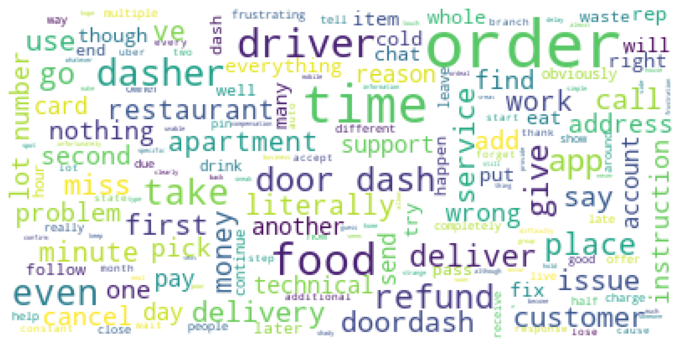

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df.review))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

**Observations from word cloud**

We have removed the stopwords and lemmatised the text, there are some miscellaneous verb forms such as *go,use,start and may* seem to dominate the review text. So in next step lets remove all the other forms of text except nouns.

In [23]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [36]:
from nltk.tag import pos_tag
from nltk.corpus.reader import word_tokenize
def noun_adj_filter(review):
  wrd_token = word_tokenize(review)
  nouns = [wrd for (wrd,pos) in pos_tag(wrd_token) if pos.startswith('N') or pos.startswith('J')]
  return nouns

In [37]:
noun_adj_filter("I have to go to office and restaurant")

['office', 'restaurant']

In [38]:
reviews_noun = df.review.apply(noun_adj_filter)
reviews_noun[:1]

0    [use, door, dash, dash, pass, few, month, order, girlfriend, family, driver, lot, order, day, generous, tip, additional, cash, factor, authorization, money, dash, pass, account, mom, account, reason, cause, lot, dasher, money, technical, support, list, step, step, card, time, everything, needless, first, branch, customer, service, nothing, short, pile, garbage, snd, try, next, day, order, food, card, same, general, info, shabam, nothing, nothing, card, time, useless, payment, dash, pass, account, actual, order, card, accept, high, branch, anything, cool, customer, go]
Name: review, dtype: object

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
vectoriser1 = CountVectorizer(ngram_range=(2,2),stopwords='english')
bow1 = vectoriser1.fit_transform(df.review)

TypeError: ignored

In [33]:
import gensim
from gensim import corpora

In [34]:
type(reviews_noun)

pandas.core.series.Series

In [40]:
diction = corpora.Dictionary(reviews_noun)
doc_term_matrix = [diction.doc2bow(rev) for rev in reviews_noun]

In [41]:
LDA = gensim.models.ldamodel.LdaModel
lda_model = LDA(corpus=doc_term_matrix,id2word=diction,num_topics=2,random_state=42,passes=10)

In [42]:
lda_model.print_topics()

[(0,
  '0.035*"order" + 0.028*"food" + 0.023*"app" + 0.019*"driver" + 0.017*"time" + 0.016*"door" + 0.015*"delivery" + 0.012*"dash" + 0.011*"restaurant" + 0.010*"doordash"'),
 (1,
  '0.071*"order" + 0.034*"food" + 0.029*"time" + 0.022*"service" + 0.022*"app" + 0.020*"doordash" + 0.019*"restaurant" + 0.019*"driver" + 0.018*"customer" + 0.016*"delivery"')]

In [43]:
print('perplexity',lda_model.log_perplexity(doc_term_matrix))

perplexity -6.299532739762476
